<a href="https://colab.research.google.com/github/Rishu-khurana/AI-ML/blob/main/AML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
ground_truth = np.load("IPgt.npy")
indian_pine = np.load("indianpinearray.npy")

In [ ]:
# installing spectral
! pip install spectral
import spectral as sp
import matplotlib.pyplot as plt

ImageView object:
  Display bands       :  (145, 145, 199)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [981.0, 1036.0]

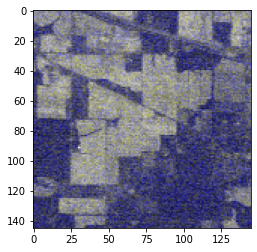

In [ ]:
#visualising Image
sp.imshow(indian_pine, (145, 145,199))

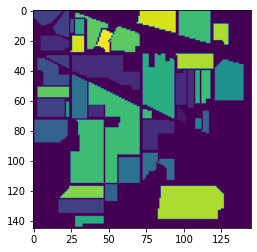

In [ ]:
plt.imshow(ground_truth)

In [ ]:
# pading data with 0's
indian_pine=np.pad(indian_pine, ((1,1), (1,1), (0, 0)), 'constant')

In [ ]:
indian_pine.shape

(147, 147, 200)

In [ ]:
# selecting 3*3 window around each pixel

h = 145
w = 145

i = 0
j = 0
c = 1
stride = 1
new_img = []
t = []

while i < h:
   # t = []
    j = 0
    while j < w:
      t.append(indian_pine[i:i+3,j:j+3,:])
       # pca = PCA(n_components=9)
       # principalComponents = pca.fit_transform(indian_pine[i: i+3, j: j+3, :].reshape(9, 200))
       # print(principalComponents.shape)
       # t.append(principalComponents)
      j+= stride
    i+= stride

   # new_img.append(t)
   # i += stride

#print(len(t))

In [ ]:
new_arr = np.array(t)

In [ ]:
new_arr.shape

(21025, 3, 3, 200)

In [ ]:
checked = new_arr.copy()

In [ ]:
checked = checked.reshape((21025,1800))

In [ ]:
checked.shape

(21025, 1800)

In [ ]:
ground_truth.shape

(145, 145)

In [ ]:
groud_truth = ground_truth.reshape((21025,1))

In [ ]:
ground_truth.shape

(145, 145)

In [ ]:
Y = ground_truth.copy()
X = checked.copy()

In [ ]:
X.shape

(21025, 1800)

In [ ]:
Y = Y.ravel()
Y

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [ ]:
Y.shape

(21025,)

clustering before dimensionality reduction and normalization

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:

samples=X
samples1=Y
model=KMeans(n_clusters=3)
model.fit(samples,samples1)
labels=model.predict(samples,samples1)
print(labels)

[0 0 0 ... 0 0 0]


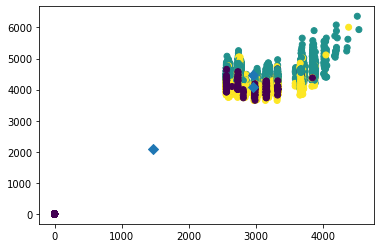

In [ ]:
X=samples[:,0]
Y=samples[:,2]
plt.scatter(X,Y,c=labels)
centroids=model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [ ]:
X=samples[:,0].reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
 #Normalisasi data dengan metode Standard Scaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
scaled_data.shape


(21025, 1)

In [ ]:
array_sum = np. sum(X)
array_has_nan = np. isnan(array_sum)
print(array_has_nan)

False


In [ ]:
np.isinf(X)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_r = pca.fit(X).transform(X)

 Clustering after pca and normalisation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(X_r)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 2 ... 0 0 0]


array([[-353.51775508],
       [ 251.22964633],
       [2916.31158145]])

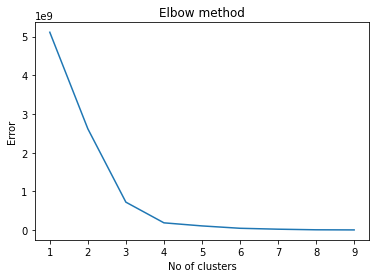

In [ ]:
Error =[]
for i in range(1 , 10 ):
    kmeans = KMeans(n_clusters = i).fit(X_r)
    kmeans.fit(X_r)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(X_r)
print(y_kmeans4)


[2 2 2 ... 1 1 1]


In [ ]:
kmeans4.cluster_centers_

array([[ 251.65191562],
       [-239.28621093],
       [2916.31158145],
       [-821.12056141]])

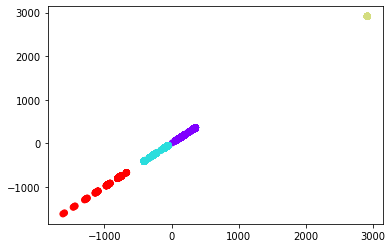

In [ ]:
plt.scatter(X_r[:,0],X_r[:,],c=y_kmeans4,cmap="rainbow")



In [ ]:
!pip install cluster

In [ ]:
from sklearn.cluster import SpectralClustering


In [ ]:
# Baseline: non-subspace clustering methods
model_kmeans = KMeans(n_clusters=4)  # k-means as baseline

model_spectral = SpectralClustering(n_clusters=4,affinity='nearest_neighbors',n_neighbors=2).fit(X_r)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
model_spectral.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
y_pred= model_spectral.fit_predict(X_r)
print(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[1 1 1 ... 3 3 1]


In [ ]:
SpectralClustering(assign_labels='discretize', n_clusters=2,random_state=0)

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

In [ ]:

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score


In [ ]:
clustering_algorithms = (
    ('KMeans', model_kmeans),
    ('Spectral Clustering', model_spectral))

In [ ]:
for name, algorithm in clustering_algorithms:
    t_begin = time.time()
    algorithm.fit(X_r)
    t_end = time.time()
    acc = accuracy_score(y_pred, model_spectral.labels_)
    nmi = normalized_mutual_info_score(y_pred,model_spectral.labels_, average_method='geometric')
    ari = adjusted_rand_score(y_pred, model_spectral.labels_)

    print('Algorithm: {}. acc: {}, nmi: {}, ari: {}, Running time: {}'.format(name, acc, nmi, ari, t_end - t_begin))

Algorithm: KMeans. acc: 1.0, nmi: 1.0, ari: 1.0, Running time: 0.07434844970703125


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Algorithm: Spectral Clustering. acc: 0.24166468489892984, nmi: 0.007978202917727646, ari: 0.00041391853921312385, Running time: 2.2072508335113525
